# ELECTORN/PHOTON CLASSIFICATION USING ResNet-15

### REQUIRED LIBRARIES

In [7]:
import numpy as np
import h5py
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torchsummary import summary

### LOADING THE DATASET

In [8]:
# electron dataset
electron_file = h5py.File("SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5", "r")  # open the file in read mode 
print(list(electron_file.keys()))  # list available datasets

# photon dataset
photon_file = h5py.File("SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5", "r")
print(list(photon_file.keys()))  

['X', 'y']
['X', 'y']


In [ ]:
# extraction of image data and labels

with electron_file as f:
    X_electron = np.array(f["X"])  # images
    y_electron = np.array(f["y"])  # labels

with photon_file as f:
    X_photon = np.array(f["X"])  
    y_photon = np.array(f["y"]) 

Electron dataset shape: (249000, 32, 32, 2) (249000,)
Photon dataset shape: (249000, 32, 32, 2) (249000,)


### INSPECTING THE DATASET

In [11]:
# Print the shape of the datasets
print("Electron dataset shape:", X_electron.shape, y_electron.shape)
print("Photon dataset shape:", X_photon.shape, y_photon.shape)

Electron dataset shape: (249000, 32, 32, 2) (249000,)
Photon dataset shape: (249000, 32, 32, 2) (249000,)


In [12]:
# Print the  data types
print("Electron dataset data type:", X_electron.dtype, y_electron.dtype)
print("Photon dataset data type:", X_photon.dtype, y_photon.dtype)

Electron dataset data type: float32 float32
Photon dataset data type: float32 float32


In [14]:
# Label Distribution
print("Electron label distribution:", np.unique(y_electron, return_counts=True))
print("Photon label distribution:", np.unique(y_photon, return_counts=True))

Electron label distribution: (array([1.], dtype=float32), array([249000], dtype=int64))
Photon label distribution: (array([0.], dtype=float32), array([249000], dtype=int64))


Notes: 
    - Sample size total: 498,000 with a ratio of 1:1 for e:p, so the dataset is balanced.
    - Image Format: 32X32 with 2 channels
                - Channel 1: Hit energy (X[:, :, :, 0])
                - Channel 2: Hit time (X[:, :, :, 1])
    - Labels: 
        - Electrons: 1
        - Photons: 0
    

### VISUALIZING SOME SAMPLES

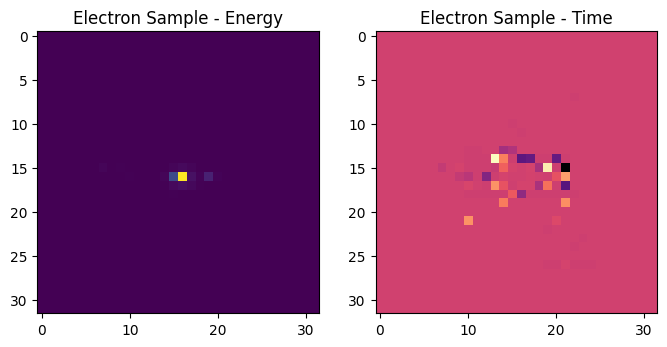

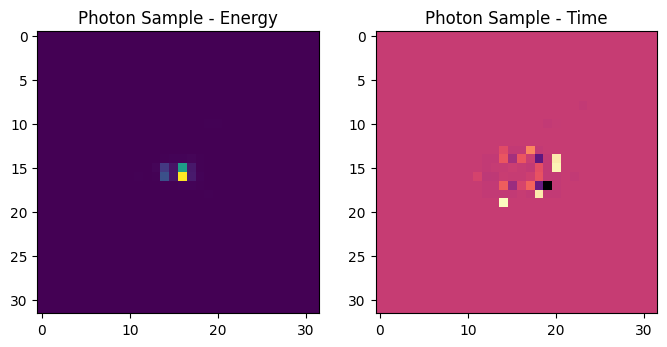

In [ ]:
def plot_sample(data, title, index=0):
    energy = data[index, :, :, 0]  # First Channel (energy)
    time = data[index, :, :, 1]  # Second Channel (time)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(energy, cmap="viridis")
    ax[0].set_title(f"{title} - Energy")
    ax[1].imshow(time, cmap="magma")
    ax[1].set_title(f"{title} - Time")
    plt.show()

plot_sample(X_electron, "Electron Sample", index=0)
plot_sample(X_photon, "Photon Sample", index=0)